In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.linear_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

training_data = pd.read_csv('./data/crossValidation.csv')
cv_data = pd.read_csv('./data/training.csv')
testing_data = pd.read_csv('./data/testing.csv')

drop_columns = ['HIBPDX', 'BPMLDX', 'Asthma', 'K6SUM42', 'PHQ242', 'round', 'dupersid', 'panel', 'VARPSU', 'VARSTR', 'PID', 'RXEXP', 
'perwt', 'SAQWT', 'DIABWF', 'deceased', 'year', 'RXNUM', 'CONDRN', 'hypertension', 'diabetes', 'joint_pain', 'DSA1C53', 'Heart_Att',
'oth_hear', 'choleste', 'Education', 'Acess_care', 'stroke', 'PCS42', 'MCS42', 'chro_bro', 'DSCONF53', 'exercise']
drop_column_med_and_kd = ['Kidney_Disorder', 'DSMED53']

In [2]:
training_data_column_drop = training_data.drop(drop_columns, axis=1)
training_data_sort_med = training_data_column_drop.sort_values(by='DSMED53')
training_data_remove_med_nan = training_data_sort_med[:-13]
training_data_remove_data_label = training_data_remove_med_nan.drop(drop_column_med_and_kd, axis=1)
training_med_false = training_data_remove_data_label[:1685]
training_med_true = training_data_remove_data_label[1685:]

In [3]:
cv_data_column_drop = cv_data.drop(drop_columns, axis=1)
cv_data_sort_med = cv_data_column_drop.sort_values(by='DSMED53')
cv_data_remove_med_nan = cv_data_sort_med[:-29]
cv_data_remove_data_label = cv_data_remove_med_nan.drop(drop_column_med_and_kd, axis=1)
cv_med_false = cv_data_remove_data_label[:3086]
cv_med_true = cv_data_remove_data_label[3086:]

In [4]:
testing_data_column_drop = testing_data.drop(drop_columns, axis=1)
testing_data_sort_med = testing_data_column_drop.sort_values(by='DSMED53')
testing_data_remove_med_nan = testing_data_sort_med[:-12]
testing_data_remove_data_label = testing_data_remove_med_nan.drop(drop_column_med_and_kd, axis=1)
testing_med_false = testing_data_remove_data_label[:1165]
testing_med_true = testing_data_remove_data_label[1165:]

In [5]:
print("Training")
print(training_med_false.shape)
print(training_med_true.shape)

print("\nCross Val")
print(cv_med_false.shape)
print(cv_med_true.shape)

print("\nTesting")
print(testing_med_false.shape)
print(testing_med_true.shape)

Training
(1685, 33)
(356, 33)

Cross Val
(3086, 33)
(748, 33)

Testing
(1165, 33)
(338, 33)


In [6]:
training_data_label = training_data_remove_med_nan['Kidney_Disorder']
cv_data_label = cv_data_remove_med_nan['Kidney_Disorder']
testing_data_label = testing_data_remove_med_nan['Kidney_Disorder']

training_med_false_data_label = training_data_label[:1685]
training_med_true_data_label = training_data_label[1685:]

cv_med_false_data_label = cv_data_label[:3086]
cv_med_true_data_label = cv_data_label[3086:]

testing_med_false_data_label = testing_data_label[:1165]
testing_med_true_data_label = testing_data_label[1165:]

In [7]:
med_false_clf = sklearn.linear_model.LogisticRegression()
med_false_clf.fit(training_med_false, training_med_false_data_label)

c:\Users\td00007\Desktop\ckd_analysis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [8]:
med_false_clf.coef_

array([[ 0.0130668 , -0.59930683, -0.03489657, -0.10526049,  0.1925971 ,
        -0.13914309, -0.84186373, -0.54335273,  0.59134625,  0.1038247 ,
         0.28429576,  0.        ,  0.33834783, -0.21959535, -0.55243685,
        -0.04374314,  0.        ,  0.        ,  0.20486094, -0.11186856,
        -0.29454266,  0.54180301, -0.13815609, -0.41652467,  0.67957291,
        -0.16029615, -0.51663663, -0.25333669, -0.02209313,  0.        ,
         0.40906191,  0.24282407, -0.01562007]])

In [9]:
med_false_clf.intercept_

array([-0.95108201])

In [10]:
med_false_clf_prediction = med_false_clf.predict(testing_med_false)

In [11]:
med_false_clf.score(testing_med_false, testing_med_false_data_label)

0.9141630901287554

In [12]:
print("""
Accuracy on medication false is {}
Precision on medication false is {}
Recall on medication false is {}
F1_score on medication false {}""".format(accuracy_score(testing_med_false_data_label, med_false_clf_prediction), precision_score(testing_med_false_data_label, 
med_false_clf_prediction, average='weighted'), recall_score(testing_med_false_data_label, med_false_clf_prediction, average='weighted'), 
f1_score(testing_med_false_data_label, med_false_clf_prediction, average='weighted')))


Accuracy on medication false is 0.9141630901287554
Precision on medication false is 0.835694155353755
Recall on medication false is 0.9141630901287554
F1_score on medication false 0.873169229584865


c:\Users\td00007\Desktop\ckd_analysis\venv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


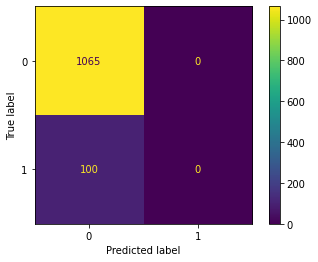

In [13]:
cm = confusion_matrix(testing_med_false_data_label, med_false_clf_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [14]:
med_true_clf = sklearn.linear_model.LogisticRegression()
med_true_clf.fit(training_med_true, training_med_true_data_label)

c:\Users\td00007\Desktop\ckd_analysis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
med_true_clf.coef_

array([[-0.01048525,  0.11289011, -0.21253875,  0.06735853, -0.06476198,
         0.04548497, -0.17998004,  0.21494613, -0.03957027, -0.17482127,
        -0.13562526,  0.        ,  0.75951846,  0.2507445 , -0.05380334,
         0.31220808,  0.        ,  0.        ,  0.59255319, -0.82026441,
        -0.28906909,  1.74342158, -0.90615628, -0.89978004, -0.09716824,
         0.05441205,  0.82525645,  0.46436104,  0.85247569,  0.        ,
         0.18892241,  0.63801414, -0.65540171]])

In [16]:
med_true_clf.intercept_

array([-1.60210897])

In [17]:
med_true_clf_prediction = med_true_clf.predict(testing_med_true)

In [18]:
med_true_clf.score(testing_med_true, testing_med_true_data_label)

0.8372781065088757

In [19]:
print("""
Accuracy on medication false is {}
Precision on medication false is {}
Recall on medication false is {}
F1_score on medication false {}""".format(accuracy_score(testing_med_true_data_label, med_true_clf_prediction), precision_score(testing_med_true_data_label, 
med_true_clf_prediction, average='weighted'), recall_score(testing_med_true_data_label, med_true_clf_prediction, average='weighted'), 
f1_score(testing_med_true_data_label, med_true_clf_prediction, average='weighted')))


Accuracy on medication false is 0.8372781065088757
Precision on medication false is 0.7383270575578267
Recall on medication false is 0.8372781065088757
F1_score on medication false 0.78469542349141


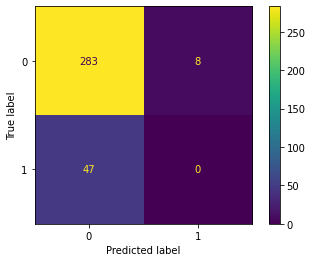

In [20]:
cm = confusion_matrix(testing_med_true_data_label, med_true_clf_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [21]:
# from sklearn import datasets, linear_model
# from sklearn.model_selection import cross_val_score
# cv_false = sklearn.linear_model.LogisticRegression()
# s = cross_val_score(cv_false, cv_med_false, cv_med_false_data_label, cv=5)
# s

c:\Users\td00007\Desktop\ckd_analysis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\td00007\Desktop\ckd_analysis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

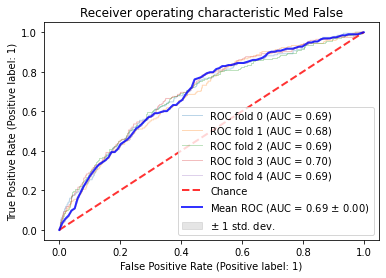

In [22]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

cv = StratifiedKFold(n_splits=5)
cv_false = sklearn.linear_model.LogisticRegression()

X = cv_med_false.to_numpy()
y = cv_med_false_data_label.to_numpy()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    cv_false.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        cv_false,
        X[train],
        y[train],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
interp_tpr[0] = 0.0
tprs.append(interp_tpr)
aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic Med False",
)
ax.legend(loc="lower right")
plt.show()

c:\Users\td00007\Desktop\ckd_analysis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\td00007\Desktop\ckd_analysis\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

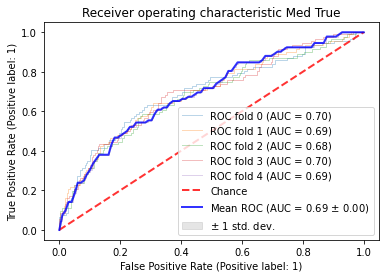

In [23]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay

cv = StratifiedKFold(n_splits=5)
cv_false = sklearn.linear_model.LogisticRegression()

X = cv_med_true.to_numpy()
y = cv_med_true_data_label.to_numpy()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    cv_false.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        cv_false,
        X[train],
        y[train],
        name="ROC fold {}".format(i),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
interp_tpr[0] = 0.0
tprs.append(interp_tpr)
aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", label="Chance", alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic Med True",
)
ax.legend(loc="lower right")
plt.show()